<a href="https://colab.research.google.com/github/ValeriaCastilloc/mydataproyects/blob/main/capgemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

hrdata_orig = pd.read_csv("employee.csv",delimiter=',')


##1. Descriptive analysis



In [ ]:
print(hrdata_orig.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [ ]:
print("Shape of the dataset:", hrdata_orig.shape)

Shape of the dataset: (1470, 35)


In [ ]:
# Checking if missing values
print("Missing values:\n", hrdata_orig.isnull().sum())

# Summary statistics
print("Summary statistics:\n", hrdata_orig.describe())

# Checking the column names
print("Columns in the dataset:\n", hrdata_orig.columns)

Missing values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole     

In [ ]:
hrdata_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
hrdata_cleaned = hrdata_orig.drop(['StandardHours', 'EmployeeCount','EmployeeNumber','Over18'], axis=1) # droping irrelevant features

In [ ]:
hrdata=pd.get_dummies(hrdata_cleaned, prefix=None, drop_first=True)

In [ ]:
hrdata= hrdata.replace({True:1, False:0}) #converting data into integers

<ipython-input-8-b78ca2b5cd6b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hrdata= hrdata.replace({True:1, False:0}) #converting data into integers


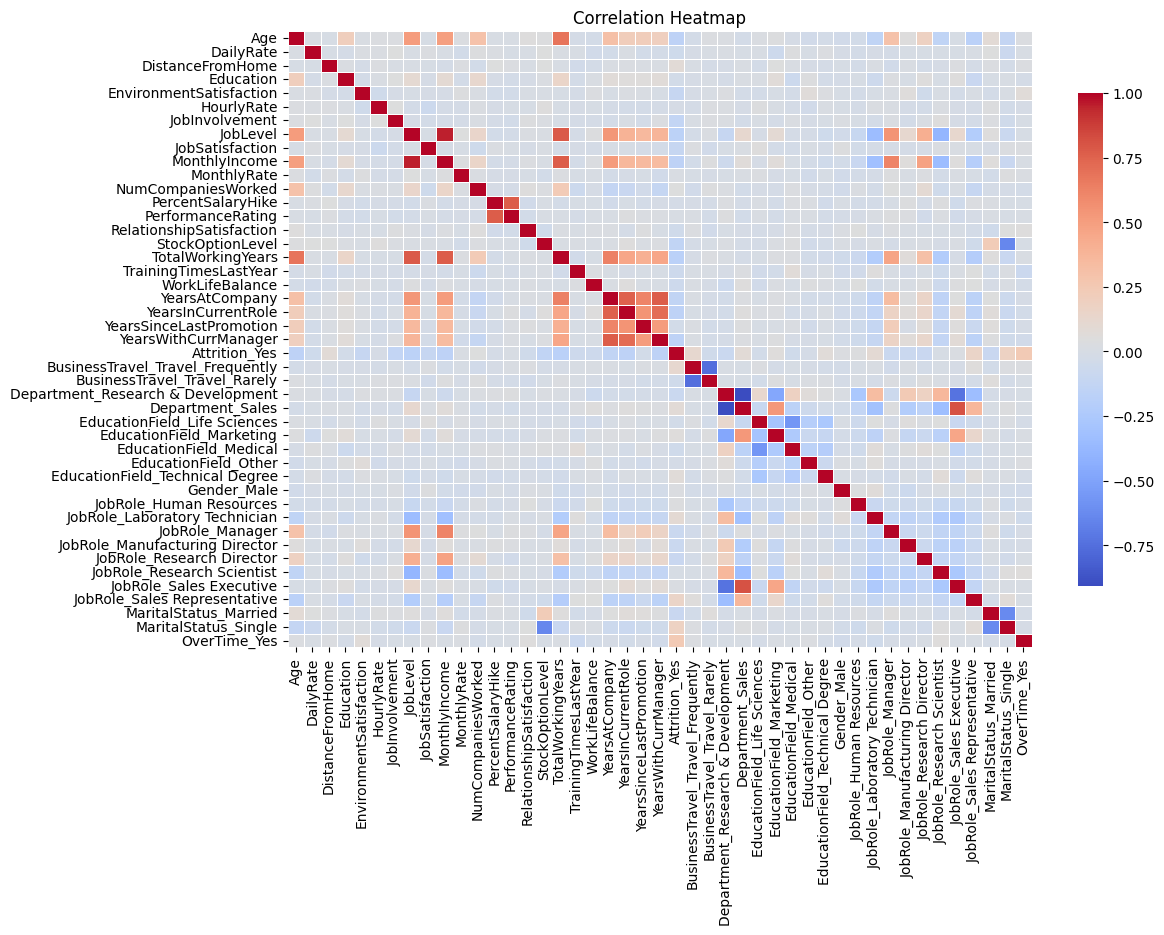

In [ ]:
# correlation to check before doing PCA
correlation_matrix = hrdata.corr()

# Visualization- Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, fmt='.2f', cmap='coolwarm', linewidths=0.5,
            cbar_kws={'shrink': 0.8}, xticklabels=True, yticklabels=True)

plt.title("Correlation Heatmap")
plt.show()

## 2. Implementation and analysis of Principal Component Analysis (PCA) and K-means clustering on this PCA

In [ ]:
X = hrdata.drop(columns=['Attrition_Yes']) # excluding target variable

# Standardize the data
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0, ddof=1)
X_std = X_std.dropna(axis=0)  # Removing rows with missing values after standardization

# Correlation matrix
Corr_mat = np.corrcoef(X_std.transpose())

# Dimensions of X_std
N = np.shape(X_std)[0]
K = np.shape(X_std)[1]

# Eigenvalues and Eigenvectors
Lamb, V = np.linalg.eig(Corr_mat)

# Ordering in descending order
idx_sort = -1 * np.argsort(-1 * Lamb)
Lamb_sort = Lamb[idx_sort]


V_sort = V[:, idx_sort] # ordering eigenvectors


pc_eigenvalues = -np.sort(-Lamb) # ordering eigenvalues

# Compute the aggregated variance explained by the principal componentes
pc_eigenvalues = np.cumsum(pc_eigenvalues / np.sum(pc_eigenvalues))

print('Eigenvalues:',pc_eigenvalues)

# #Components that explain at least the 80% of the variance
number = np.argmax(pc_eigenvalues > 0.8) + 1
print("80% of the data is explained by " + str(number), 'components')

Eigenvalues: [0.12130945 0.19979097 0.24685069 0.29204157 0.3326264  0.37169904
 0.40822732 0.43879025 0.46834875 0.49652363 0.52405344 0.55077621
 0.57687046 0.602779   0.62717491 0.65118557 0.67473629 0.69800334
 0.72073437 0.74290378 0.76482632 0.7865162  0.80774432 0.82825715
 0.84842745 0.86818626 0.88705883 0.90484535 0.92198479 0.9376105
 0.95031859 0.96167444 0.96799337 0.97374252 0.9788063  0.98378272
 0.98830404 0.99214423 0.99537462 0.9977048  0.99853172 0.99929679
 0.99978869 1.        ]
80% of the data is explained by 23 components


In [ ]:
# Creating a DataFrame to store eigenvalues and their corresponding variable names
eigenvalue_df = pd.DataFrame({'Variable': X_std.columns, 'Eigenvalue': Lamb_sort})

# Sorting the DataFrame by eigenvalue in descending order
eigenvalue_df = eigenvalue_df.sort_values('Eigenvalue', ascending=False)

# Printing the top variables with highest contribution
print("Variables with the highest contribution:")
print(eigenvalue_df.head(23))

Variables with the highest contribution:
                          Variable  Eigenvalue
0                              Age    5.337616
19                  YearsAtCompany    3.453187
20              YearsInCurrentRole    2.070628
21         YearsSinceLastPromotion    1.988399
22            YearsWithCurrManager    1.785733
18                 WorkLifeBalance    1.719196
17           TrainingTimesLastYear    1.607244
29          EducationField_Medical    1.344769
8                  JobSatisfaction    1.300574
30            EducationField_Other    1.239695
32                     Gender_Male    1.211312
34   JobRole_Laboratory Technician    1.175802
35                 JobRole_Manager    1.148147
36  JobRole_Manufacturing Director    1.139976
40    JobRole_Sales Representative    1.073420
42            MaritalStatus_Single    1.056469
43                    OverTime_Yes    1.036232
6                   JobInvolvement    1.023750
5                       HourlyRate    1.000165
1                  

Variance: [0.11964558 0.07719063]


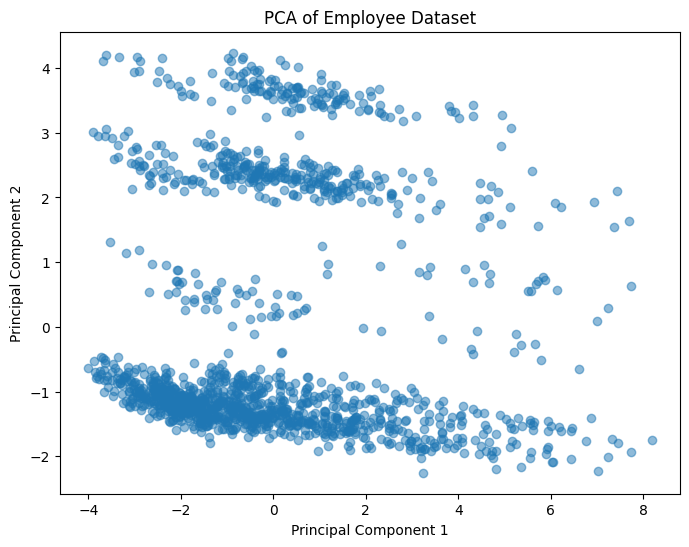

In [ ]:
# Standardize the data
scaler = StandardScaler()
hrdata_scaled = scaler.fit_transform(hrdata)

pca = PCA(n_components=2)  #  using 2 PC for visualization
hrdata_pca = pca.fit_transform(hrdata_scaled)

#  DataFrame for PCA results
pca_df = pd.DataFrame(data=hrdata_pca, columns=['PC1', 'PC2'])

# Print explained variance ratio
print("Variance:", pca.explained_variance_ratio_)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title("PCA of Employee Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

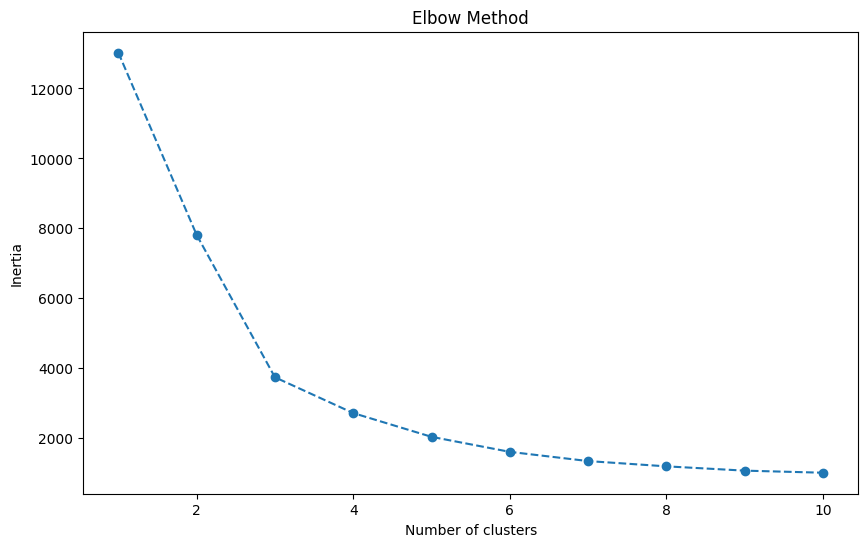

In [ ]:
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(hrdata_pca)
    ss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), ss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The optimal number of clusters is = 3.

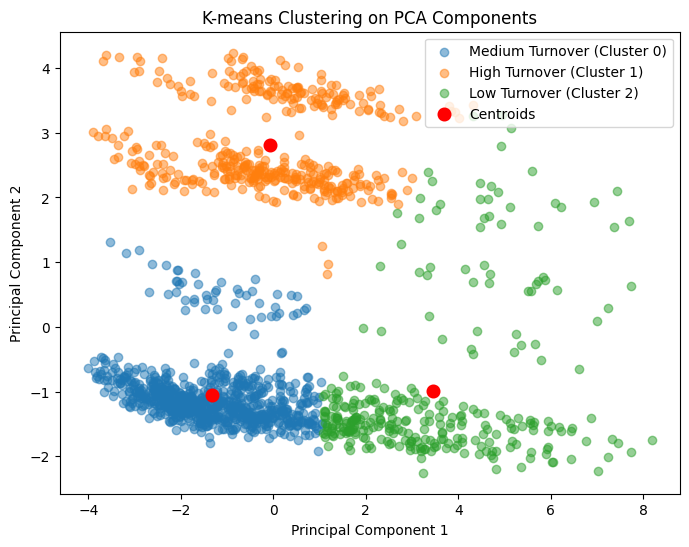

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42) # optimal number of clusters = 3
clusters = kmeans.fit_predict(hrdata_pca)  # fitting data

# PCA DataFrame
pca_df['cluster'] = clusters

centroids = kmeans.cluster_centers_

# Turnover rate for each cluster
turnover_rates = []
for i in range(3):  # Assuming 3 clusters
    cluster_data = hrdata[clusters == i]
    turnover_rate = cluster_data['Attrition_Yes'].mean()
    turnover_rates.append(turnover_rate)

# Clustering categorization based on turnover rate
cluster_names = []
for i, rate in enumerate(turnover_rates):
    if rate < 0.1:
        cluster_names.append(f"Low Turnover (Cluster {i})")
    elif rate < 0.2 :
        cluster_names.append(f"Medium Turnover (Cluster {i})")
    else:
        cluster_names.append(f"High Turnover (Cluster {i})")



# Visualization
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(pca_df['PC1'][clusters == i], pca_df['PC2'][clusters == i], label=cluster_names[i], alpha=0.5) #  using 2 PC for visualization
plt.scatter(centroids[:, 0], centroids[:, 1], marker='.', s=200, linewidths=3, color='r', label='Centroids')
plt.legend()
plt.title("K-means Clustering on PCA Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [ ]:
X['cluster'] = clusters
print(X['cluster'].value_counts()) # size of each cluster (data points)

cluster
0    767
1    397
2    306
Name: count, dtype: int64


## 3. Training and analysis of a prediction model based on decision trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Decision Tree

y = hrdata['Attrition_Yes']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and trainning the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predictions
y_pred = dt_classifier.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 0.7619047619047619
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       255
           1       0.16      0.18      0.17        39

    accuracy                           0.76       294
   macro avg       0.51      0.52      0.51       294
weighted avg       0.78      0.76      0.77       294



Confusion Matrix:


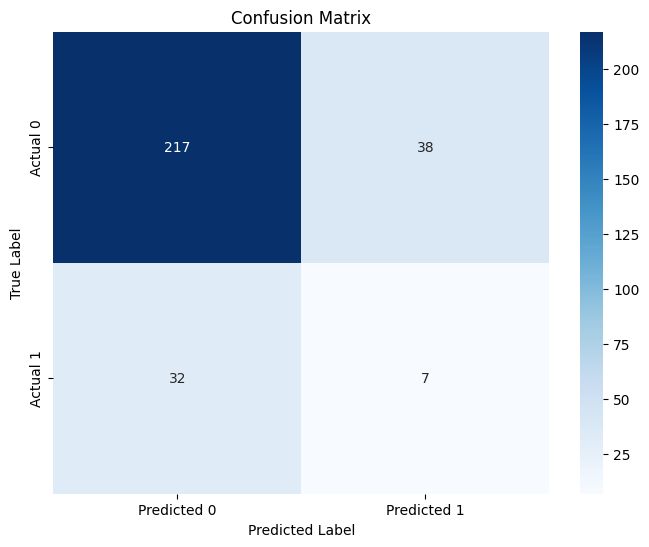

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
conf_matrix

#Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#Getting a better model in terms of accuracy

y = hrdata['Attrition_Yes']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20% testing, 80% training

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

# XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
xgb_predictions = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy}")

# Model Comparison (Decision Tree, Random Forest, XGBoost)
if rf_accuracy > xgb_accuracy and rf_accuracy > accuracy:
  print("Random Forest is the best model")
  best_model = rf_classifier
  best_predictions = rf_predictions
elif xgb_accuracy > rf_accuracy and xgb_accuracy > accuracy:
  print("XGBoost is the best model")
  best_model = xgb_classifier
  best_predictions = xgb_predictions
else:
  print("Decision Tree is the best model")
  best_model = dt_classifier
  best_predictions = y_pred

Random Forest Accuracy: 0.8741496598639455
XGBoost Accuracy: 0.8775510204081632
XGBoost is the best model


              precision    recall  f1-score   support

           0       0.90      0.96      0.93       255
           1       0.57      0.31      0.40        39

    accuracy                           0.88       294
   macro avg       0.74      0.64      0.67       294
weighted avg       0.86      0.88      0.86       294

Confusion Matrix:
[[246   9]
 [ 27  12]]


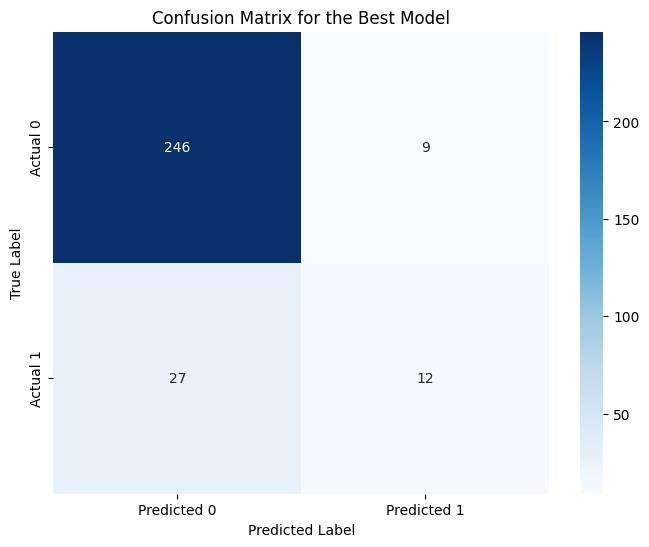

In [ ]:
# Best Model Evaluation
print(classification_report(y_test, best_predictions))
conf_matrix = confusion_matrix(y_test, best_predictions)
print("Confusion Matrix:")
print(conf_matrix)


# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for the Best Model")
plt.show()

## 4. Analysis of a SHAP (SHapley Additive exPlanations) diagram

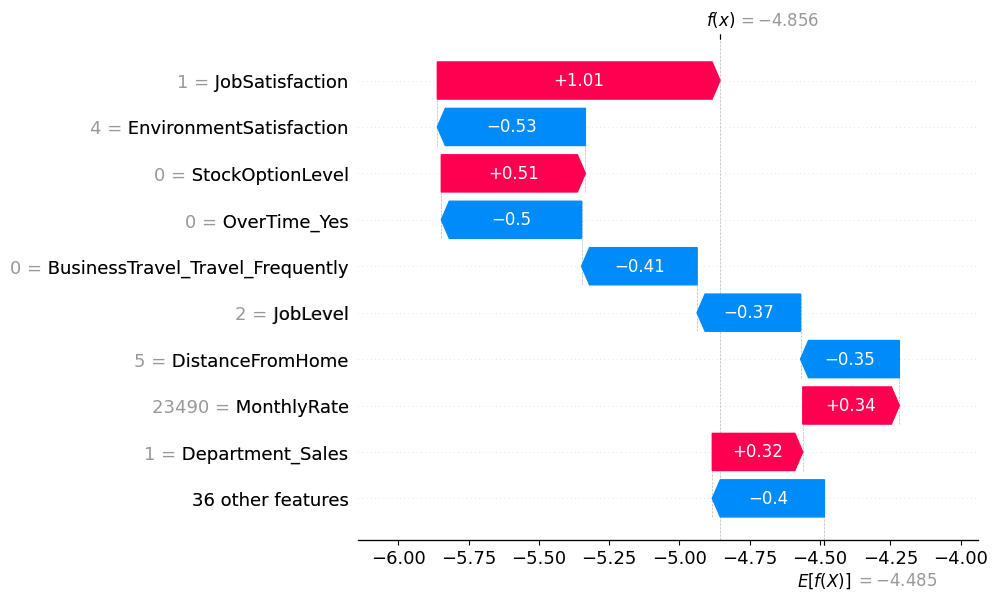

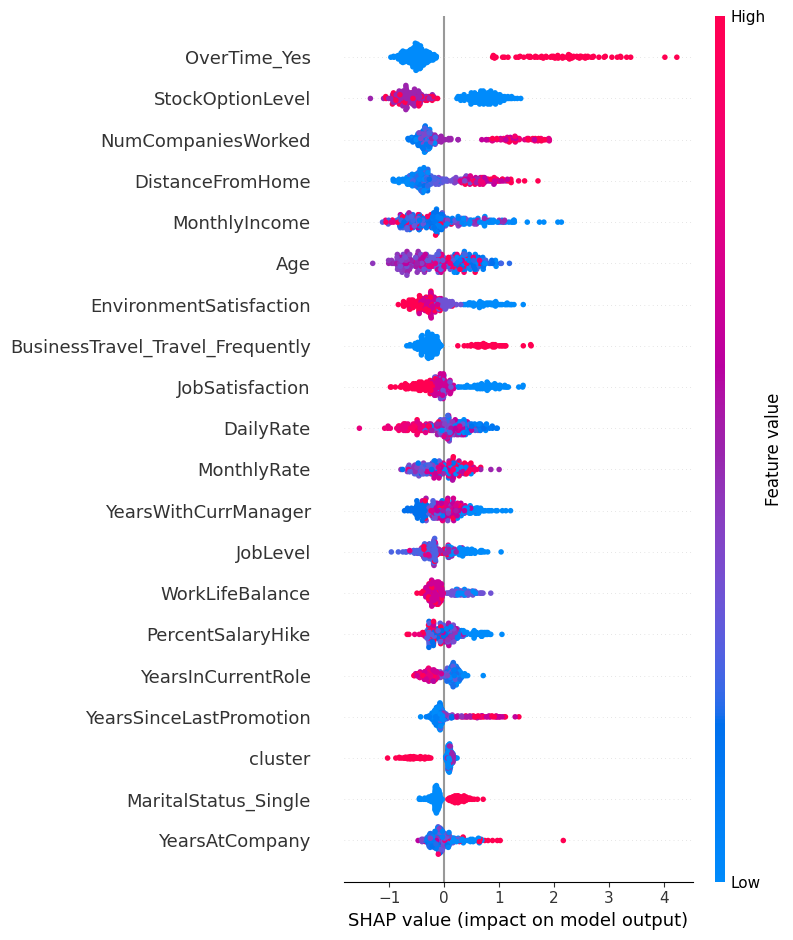

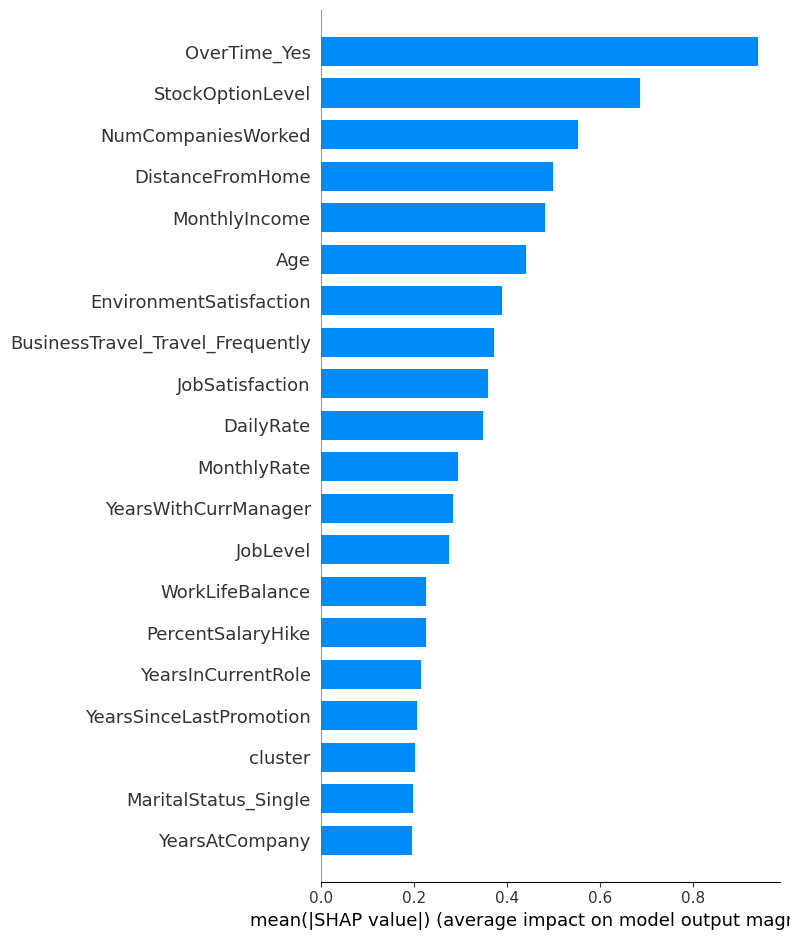

In [ ]:
!pip install shap
import shap


explainer = shap.Explainer(xgb_classifier, X_train)
shap_values = explainer(X_test)

# Viz waterfall plot for the first instance
shap.plots.waterfall(shap_values[0])

# Summary plot
shap.summary_plot(shap_values, X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
